In [9]:
import pandas as pd
import numpy as np
%pylab inline
import pickle

Populating the interactive namespace from numpy and matplotlib


In [17]:
c_range = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
c_range += [5e-3,5e-2,5e-1,5e1,5e2,5e3,5e4]
t_range = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
t_range += [.15,.25,.35,.45,.55,.65,.75,.85,.95]
k_range = np.arange(50, 2200, 25)
flag_range = [True, False]
t_axis,k_axis,c_axis,norm_axis = 0,1,2,3

In [13]:
def get_scores(mode):
    raw_data = pickle.load(open('{}.pickle'.format(mode)))
    return np.array([x[1] for x in raw_data]).reshape(len(t_range), len(k_range),len(c_range),len(flag_range))

In [14]:
dmean_data = get_scores('dmean')
fa_data = get_scores('fa')
kmean_data = get_scores('kmean')

In [42]:
## Create data
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
print collectn_1.shape
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

## combine these different collections into a list    
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

(200,)


In [62]:
flat_scores = map(lambda x : x.flatten(),[dmean_data,kmean_data,fa_data])

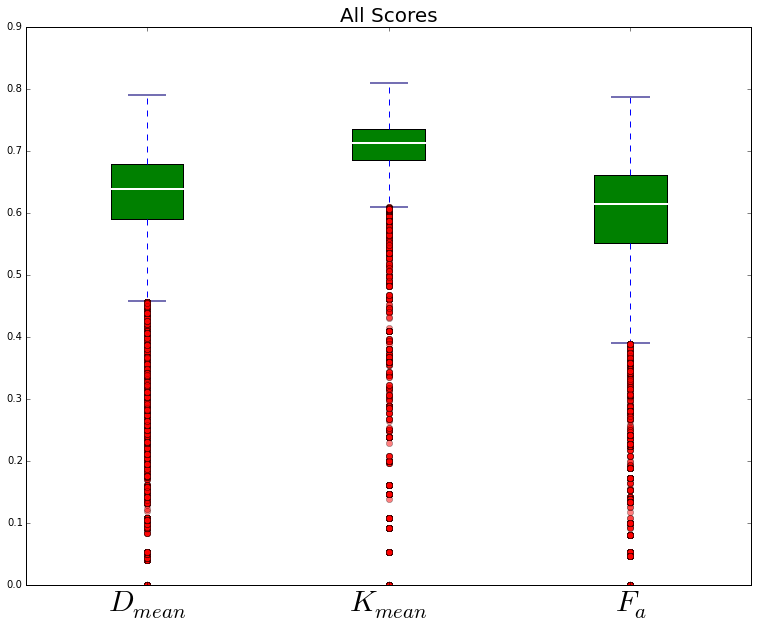

In [89]:

fig = plt.figure(1, figsize=(13, 10))
ax = fig.add_subplot(111)
ax.set_title('All Scores',size=20)
bp = ax.boxplot(flat_scores,patch_artist=True)
ax.set_xticklabels(['$D_{mean}$','$K_{mean}$','$F_a$'],size=30)

for box in bp['boxes']:
    box.set( facecolor = 'green' )    
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='white', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
    
show()